<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #7: CNN models

<span style="color:blue; font-size: 12pt">Sergey Kolesnikov</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> scitator@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **27 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task7.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

---

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться для понимания темы.

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

<Ответ>

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

<Ответ>


**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

<Ответ>

**Вопрос 4**: Можно ли сделать стайл трансфер для музыки и как?

<Ответ>

---

<h1 align="center">Theory Questions</h1> 

---

### Useful notebooks
#### Colab link (seminar): https://colab.research.google.com/drive/18xjvLspViCwTUXTBNiz_xKxlUblQuGPU
#### Colab link (hw): https://colab.research.google.com/drive/1FlYpA-JHCZ1UilPScC2zWhZNCkE3Sv78

---

# CIFAR Quest

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for correct check questions
* +1 for beating each of these milestones on __TEST__ dataset:
    * 60% (5 total)
    * 65% (6 total)
    * 70% (7 total)
    * 75% (8 total)
    * 80% (9 total)
    * 82% (10 total)
* +2 for really cool solution:
    * 84% (12 total)
    * 86% (14 total)
    * 88% (16 total)
    * 90% (18 total)
    * 92% (20 total)
    
## Bonus points

Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example "A super-small/fast NN that gets 80%" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)

## Restrictions
* Please do __NOT__ use pre-trained networks for this assignment.
 * In other words, milestones must be beaten without pre-trained nets (and such net must be present in the e-mail).
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

---

In [1]:
# Load data. It may work slow.
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0   284k      0  0:09:45  0:09:45 --:--:--  374k 0   237k      0  0:11:42  0:01:38  0:10:04  272k   0   254k      0  0:10:55  0:02:59  0:07:56  297k   0   259k      0  0:10:41  0:05:01  0:05:40  189k0  0:10:46  0:05:21  0:05:25  243k   272k      0  0:10:10  0:07:59  0:02:11  410k:09:46  0:09:40  0:00:06  365k
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [13]:
import _pickle as pickle
import os
import time
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [14]:
tf.__version__

'1.6.0'

In [15]:
tf.test.is_gpu_available()

False

In [16]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [17]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

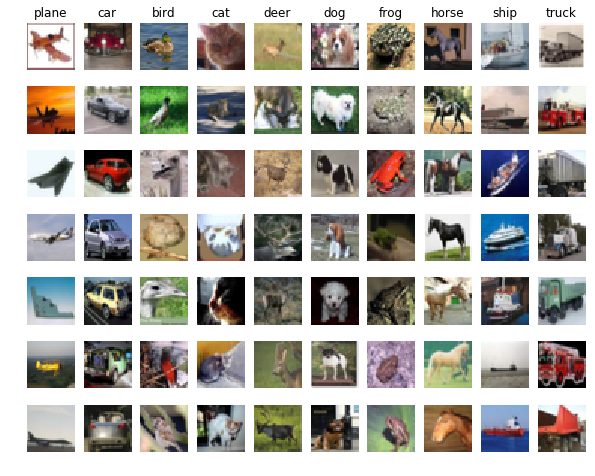

In [18]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [19]:
X_train.shape, y_train[0]  #, pool1.shape

((50000, 3, 32, 32), 6)

In [20]:
f = np.stack(
    [np.stack([np.arange(25).reshape((5, 5)) * (i+1) + j for i in range(3)]) for j in range(2)])
def flip_color(f):
    F = np.empty(shape=(f.shape[0], f.shape[2], f.shape[3], f.shape[1]))
    for i in range(3):
        F[:, :, :, i] = f[:, i, :, :]
    return  F

In [21]:
i, c = 1, 1
f[i, c, :, :] == flip_color(f)[i, :, :, c]

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [22]:
def one_hot(y):
    y_hot = np.zeros(shape=(len(y), 10))
    for i in range(10):
        y_hot[y == i, i] = 1
    return y_hot

In [23]:
y_train, y_test = one_hot(y_train), one_hot(y_test)

X_train, X_test = flip_color(X_train), flip_color(X_test)

In [24]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [25]:
mode = tf.estimator.ModeKeys.TRAIN

input_layer = tf.placeholder('float32', shape=(None, 32, 32, 3))

# Convolutional Layer #1
conv1 = tf.layers.conv2d(
    inputs=input_layer,
    filters=32,
    kernel_size=[5, 5],
    padding="same",
    activation=tf.nn.relu)

# Pooling Layer #1
pool1 = tf.layers.max_pooling2d(
    inputs=conv1, 
    pool_size=[2, 2], 
    strides=2)

In [27]:
pool1.shape[1:]

TensorShape([Dimension(16), Dimension(16), Dimension(32)])

In [28]:
pool1_flat = tf.reshape(pool1, [-1, 16 * 16 * 32])
dense = tf.layers.dense(
    inputs=pool1_flat, 
    units=1024, 
    activation=tf.nn.relu)

dropout = tf.layers.dropout(
    inputs=dense, 
    rate=0.4, 
    training = (mode == tf.estimator.ModeKeys.TRAIN))

softmax = tf.layers.dense(
    inputs=dropout,
    units=10,
    activation=tf.nn.softmax,
    name="softmax")

output = tf.placeholder(tf.float32, shape=[None, 10], name='Output')

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=softmax, labels=output))
y_pred_cls = tf.argmax(softmax, axis=1)

In [29]:
correct_prediction = tf.equal(y_pred_cls, tf.argmax(output, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [37]:
global_step = tf.Variable(initial_value=0, trainable=False, name='global_step')
learning_rate = tf.placeholder(tf.float32, shape=[], name='learning_rate')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,
                                   beta1=0.9,
                                   beta2=0.999,
epsilon=1e-08).minimize(loss, global_step=global_step)

In [44]:
# Write your convolutional NN with Tensorflow (example in seminar).
# For example 3 convolutions and poolings and dense layer after that.

def train_fn(X, y, sess):
    '''
    returns tuple (loss, accuracy) for model train phase
    '''
    loss_value, accuracy_value, _ = sess.run([loss, accuracy, optimizer],
                                             feed_dict={input_layer:X, output:y, learning_rate: 0.1})
    return loss_value, accuracy_value

def eval_fn(X, y, sess):
    '''
    returns tuple (loss, accuracy) for model evaluation phase
    '''
    loss_value, accuracy_value = sess.run([loss, accuracy],
                                          feed_dict={input_layer:X, output:y, learning_rate: 0.1})
    return loss_value, accuracy_value

def predict_fn(X, sess):
    '''
    returns y_pred for model predict phase
    '''
    
    y_pred_cls_value = sess.run([y_pred_cls], feed_dict={input_layer:X, learning_rate: 0.1})
    return y_pred_cls_value


In [45]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [46]:
# @TODO: add your code for train&validation metrics plots:
#  - epoch loss (train&validation - 2 curves on same figure)
#  - epoch accurary (train&validation - 2 curves on same figure)

In [47]:
X_val, y_val = X_test, y_test

In [48]:
num_epochs = 10 
batch_size = 64

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        train_loss = 0
        train_acc = 0
        train_batches = 0
        start_time = time.time()
        for batch in iterate_minibatches(X_train, y_train, batch_size):
            inputs, targets = batch
            train_loss_batch, train_acc_batch = train_fn(inputs, targets, sess)
            train_loss += train_loss_batch
            train_acc += train_acc_batch
            train_batches += 1
    
        # And a full pass over the validation data:
        valid_loss = 0
        valid_acc = 0
        valid_batches = 0
        for batch in iterate_minibatches(X_val, y_val, batch_size):
            inputs, targets = batch
            valid_loss_batch, valid_acc_batch = eval_fn(inputs, targets, sess)
            valid_loss += valid_loss_batch
            valid_acc += valid_acc_batch
            valid_batches += 1
    
        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
        print("  train loss:\t\t{:.6f}".format(train_loss / train_batches))
        print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
        print("  valid loss:\t\t{:.6f}".format(valid_loss / valid_batches))
        print("  valid accuracy:\t\t{:.2f} %".format(valid_acc / valid_batches * 100))
        
    ###
    ### TEST
    ###
    
    print("\n\n\n TEST TEST TEST \n___________________\n\n")
    test_acc = 0
    test_batches = 0
    for batch in iterate_minibatches(X_test, y_test, 500):
        inputs, targets = batch
        _, acc = eval_fn(inputs, targets, sess)
        test_acc += acc
        test_batches += 1
    print("Final results:")
    print("  test accuracy:\t\t{:.2f} %".format(
        test_acc / test_batches * 100))

    if test_acc / test_batches * 100 > 92.5:
        print("Achievement unlocked: mage 80 lvl")
    else:
        print("Feed more!")
        
        
        

Epoch 1 of 10 took 91.129s
  train loss:		2.361978
  train accuracy:		9.92 %
  valid loss:		2.364796
  valid accuracy:		9.64 %
Epoch 2 of 10 took 95.073s
  train loss:		2.361018
  train accuracy:		10.01 %
  valid loss:		2.359087
  valid accuracy:		10.21 %
Epoch 3 of 10 took 93.968s
  train loss:		2.360518
  train accuracy:		10.06 %
  valid loss:		2.362392
  valid accuracy:		9.88 %
Epoch 4 of 10 took 90.987s
  train loss:		2.361878
  train accuracy:		9.93 %
  valid loss:		2.361992
  valid accuracy:		9.92 %
Epoch 5 of 10 took 92.044s
  train loss:		2.361438
  train accuracy:		9.97 %
  valid loss:		2.359888
  valid accuracy:		10.13 %
Epoch 6 of 10 took 93.218s
  train loss:		2.362118
  train accuracy:		9.90 %
  valid loss:		2.358686
  valid accuracy:		10.25 %
Epoch 7 of 10 took 91.273s
  train loss:		2.362279
  train accuracy:		9.89 %
  valid loss:		2.362292
  valid accuracy:		9.89 %


KeyboardInterrupt: 

### Hi, my name is `...Luke Cifarwalker...`, and here's my story

A long ago in a galaxy far far away, when it was still more than an hour before deadline, i got an idea:

##### I gonna build a neural network, that
...

How could i be so naive?!

##### One day, with no signs of warning,
....

##### Finally, after __  iterations, __ mugs of [tea/coffee]
* what was the final architecture
* as well as training method and tricks
